<img src="world-university-ranking-1654760144.jpg" width="450" height="100">

2004-2023 info from 
[QS](https://www.qs.com/reports-whitepapers/qs-world-university-rankings-2023-result-tables-excel/) website \
Data included in this spreadsheet: \
    &emsp; &nbsp; Overall rank & score \
    &emsp; &nbsp; Classifications \
    &emsp; &nbsp; Academic Reputation (rank & score) \
    &emsp; &nbsp; Employer Reputation (rank & score) \
    &emsp; &nbsp; Faculty Student (rank & score) \
    &emsp; &nbsp; Citations per Faculty (rank & score) \
    &emsp; &nbsp; International Faculty (rank & score) \
    &emsp; &nbsp; International Students (rank & score) \
    &emsp; &nbsp; International Research Network (rank & score) \
    &emsp; &nbsp; Employment Outcomes (rank & score) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from collections import Counter
from numpy import where, mean
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Matplotlib is building the font cache; this may take a moment.


## Importing dataset

In [194]:
df = pd.read_csv(r'2023 QS World University Rankings.csv')
df.tail(10)

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
1412,1413,Universidad Católica de Santiago de Guayaquil,EC,Ecuador,3.4,501+,7.5,501+,2.8,601+,...,601+,4.4,601+,1.0,601+,5.9,601+,30.3,413,-
1413,1414,Universidad Católica de Temuco,CL,Chile,3.1,501+,1.4,501+,2.1,601+,...,601+,NaN,NaN,NaN,NaN,10.6,601+,4.6,601+,-
1414,1415,Universidad de Tarapaca,CL,Chile,3.3,501+,3.0,501+,1.9,601+,...,601+,NaN,NaN,NaN,NaN,30.2,601+,4.9,601+,-
1415,1416,Universidad Mayor de San Simón Cochabamba,BO,Bolivia,3.6,501+,3.3,501+,1.2,601+,...,601+,NaN,NaN,NaN,NaN,13.7,601+,1.0,601+,-
1416,1417,Universidad Michoacana de San Nicolás de Hidalgo,MX,Mexico,3.4,501+,2.3,501+,2.8,601+,...,601+,NaN,NaN,NaN,NaN,19.3,601+,4.1,601+,-
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,501+,5.8,501+,3.6,601+,...,601+,1.7,601+,NaN,NaN,8.1,601+,NaN,NaN,-
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,501+,5.8,501+,2.4,601+,...,601+,9.3,601+,1.3,601+,8.8,601+,30.9,403,-
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,501+,2.6,501+,3.2,601+,...,601+,5.2,601+,2.8,601+,51.1,601+,NaN,NaN,-
1420,1421,University of Craiova,RO,Romania,3.3,501+,1.8,501+,2.7,601+,...,601+,NaN,NaN,NaN,NaN,7.5,601+,8.7,601+,-
1421,1422,University of Oradea,RO,Romania,4.0,501+,2.1,501+,3.3,601+,...,601+,1.7,601+,7.9,601+,16.6,601+,9.7,601+,-


In [195]:
# Keeping just the score columns:
import re
columns = df.columns.tolist()
print(columns)
for cols in columns:
    if re.search('rank',cols):
        df.drop(columns=cols,inplace=True)

['Rank', 'institution', 'location code', 'location', 'ar score', 'ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score', 'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank', 'irn score', 'irn rank', 'ger score', 'ger rank', 'score scaled']


In [196]:
# Dropping other non necessary columns
df_fil = df.drop(columns=['institution', 'location code', 'location','score scaled'])

In [197]:
df_fil.isna().sum()

Rank          0
ar score      0
er score      1
fsr score     2
cpf score     5
ifr score    98
isr score    57
irn score    13
ger score    12
dtype: int64

In [198]:
df_fil = df_fil.sort_values(by=['Rank'], ascending=True)
df_filled = df_fil.bfill()

In [199]:
X = df_filled.drop(columns=['Rank'])
y = df_filled['Rank']
X.shape

(1422, 8)

In [80]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
df_scl_t = scaling.fit_transform(X)
scaled_columns=scaling.feature_names_in_.tolist()

df_scl = pd.DataFrame(df_scl_t, columns=scaled_columns)
X = df_scl

In [ ]:
# Q1_upp, Q2_upp, Q3_upp = df_fil['ifr score'].quantile([0.25, 0.5, 0.75])
# Q1_low = min(df_fil['ifr score'])
# Q2_low
# Q4_low = max(df_fil['ifr score'])


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [160]:
from sklearn.cluster import KMeans
wss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, n_init = 'auto', init='k-means++', random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were foun

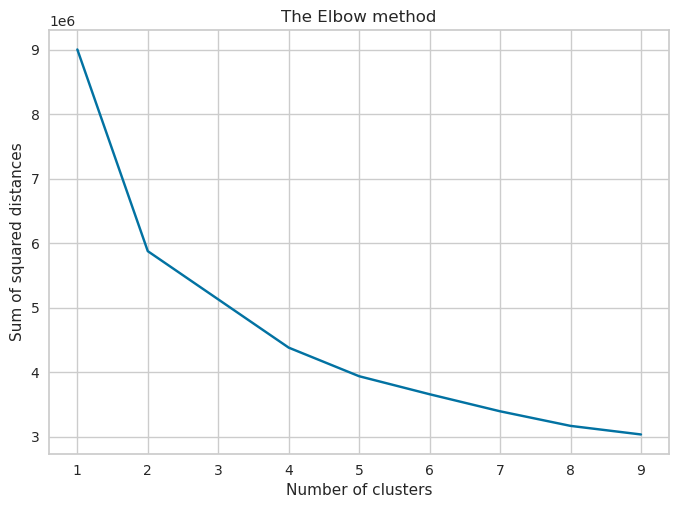

In [161]:
plt.plot(range(1,10), wss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [88]:
pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 8.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10),
                 timings=False)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were foun

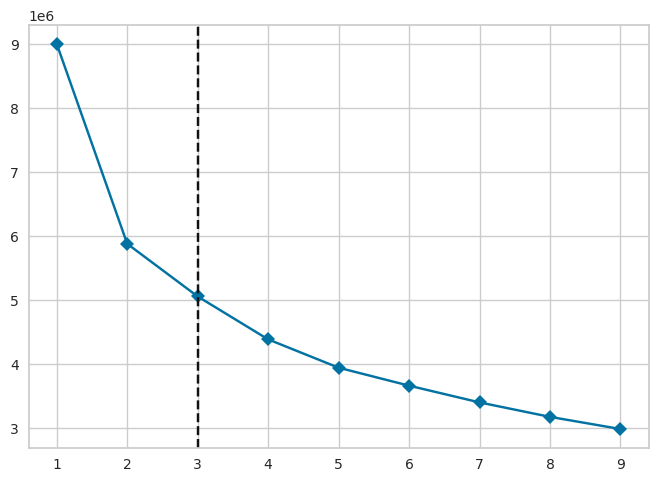

In [162]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(X)

In [168]:
from sklearn.decomposition import PCA

pca = PCA(8)
X_pca = pca.fit_transform(X)
X_pca.shape

(1422, 8)

In [201]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)

In [165]:
X

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0
...,...,...,...,...,...,...,...,...
1417,4.6,5.8,3.6,1.0,1.7,1.3,8.1,30.9
1418,3.0,5.8,2.4,2.2,9.3,1.3,8.8,30.9
1419,2.8,2.6,3.2,3.6,5.2,2.8,51.1,8.7
1420,3.3,1.8,2.7,2.0,1.7,7.9,7.5,8.7


findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Comic Sans MS
findfont: Generic family 'sans-serif' not found because none of the following families were foun

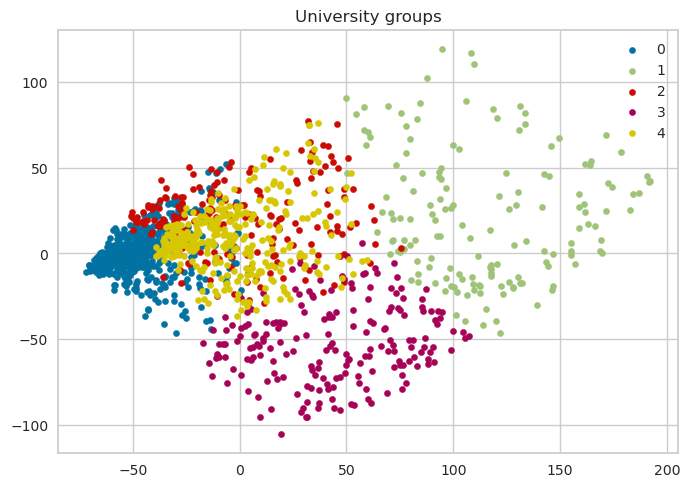

In [202]:
for i in unique_labels:
    plt.scatter(X_pca[label==i,0], X_pca[label==i,1], label=i, s=20)
    
plt.legend()
plt.title('University groups')
plt.show()

In [219]:
clusters=kmeans.labels_.tolist()
X['Rank'] = y
X['clusters'] = clusters
X['University'] = df['institution']
X['Location'] = df['location']
df_final = X
df_final

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,Rank,clusters,University,Location
0,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0,1,1,Massachusetts Institute of Technology (MIT),United States
1,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0,2,1,University of Cambridge,United Kingdom
2,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0,3,1,Stanford University,United States
3,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0,4,1,University of Oxford,United Kingdom
4,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0,5,1,Harvard University,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
1417,4.6,5.8,3.6,1.0,1.7,1.3,8.1,30.9,1418,0,Universidad Nacional Autónoma de Honduras (UNAH),Honduras
1418,3.0,5.8,2.4,2.2,9.3,1.3,8.8,30.9,1419,0,Universidad Tecnológica de Bolívar,Colombia
1419,2.8,2.6,3.2,3.6,5.2,2.8,51.1,8.7,1420,0,Université Mohammed V de Rabat,Morocco
1420,3.3,1.8,2.7,2.0,1.7,7.9,7.5,8.7,1421,0,University of Craiova,Romania


In [220]:
df_final

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,Rank,clusters,University,Location
0,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0,1,1,Massachusetts Institute of Technology (MIT),United States
1,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0,2,1,University of Cambridge,United Kingdom
2,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0,3,1,Stanford University,United States
3,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0,4,1,University of Oxford,United Kingdom
4,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0,5,1,Harvard University,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
1417,4.6,5.8,3.6,1.0,1.7,1.3,8.1,30.9,1418,0,Universidad Nacional Autónoma de Honduras (UNAH),Honduras
1418,3.0,5.8,2.4,2.2,9.3,1.3,8.8,30.9,1419,0,Universidad Tecnológica de Bolívar,Colombia
1419,2.8,2.6,3.2,3.6,5.2,2.8,51.1,8.7,1420,0,Université Mohammed V de Rabat,Morocco
1420,3.3,1.8,2.7,2.0,1.7,7.9,7.5,8.7,1421,0,University of Craiova,Romania


In [221]:
df_cluster_0 = df_final[df_final['clusters']==0]
df_cluster_1 = df_final[df_final['clusters']==1]
df_cluster_2 = df_final[df_final['clusters']==2]
df_cluster_3 = df_final[df_final['clusters']==3]
df_cluster_4 = df_final[df_final['clusters']==4]

In [222]:
df_cluster_0.describe()

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,Rank,clusters
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.0
mean,7.833333,10.893223,16.394872,6.213370,9.657875,7.977106,24.072161,18.106777,1095.232601,0.0
std,5.928549,12.871090,13.090489,7.641876,11.610031,11.482867,15.530089,20.726631,224.290349,0.0
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000,364.000000,0.0
25%,4.000000,3.200000,5.900000,1.700000,2.700000,1.700000,10.600000,4.900000,927.250000,0.0
50%,5.700000,6.000000,12.650000,3.200000,5.200000,3.150000,21.400000,9.400000,1124.500000,0.0
75%,9.775000,12.800000,22.600000,6.800000,11.400000,8.400000,36.800000,21.875000,1280.750000,0.0
max,43.800000,84.300000,66.400000,48.600000,77.000000,86.500000,62.200000,99.600000,1422.000000,0.0


In [223]:
df_cluster_1.describe()

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,Rank,clusters
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.0
mean,70.945161,68.863871,57.899355,66.159355,72.826452,63.702581,87.627097,65.278065,85.032258,1.0
std,22.974068,25.206915,31.481622,26.146865,29.451457,29.685575,12.117307,25.929668,56.657598,0.0
min,8.400000,12.600000,4.000000,1.800000,7.600000,2.600000,30.900000,6.200000,1.000000,1.0
25%,54.750000,48.900000,28.800000,48.550000,49.800000,38.550000,83.500000,43.250000,39.500000,1.0
50%,72.800000,71.800000,60.900000,68.700000,86.300000,70.200000,91.800000,65.000000,78.000000,1.0
75%,92.050000,93.450000,87.900000,90.200000,98.900000,92.500000,96.250000,90.600000,120.500000,1.0
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,252.000000,1.0


In [224]:
df_cluster_2.describe()

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,Rank,clusters
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0
mean,18.176382,18.979397,75.189447,14.288945,20.155276,26.543216,46.578392,24.746734,443.160804,2.0
std,15.144659,19.881160,17.070733,18.745668,21.649171,25.478368,27.244590,24.665329,191.000699,0.0
min,2.100000,1.000000,27.400000,1.000000,1.100000,1.300000,1.000000,1.000000,79.000000,2.0
25%,6.900000,3.950000,63.150000,2.300000,5.500000,6.400000,22.950000,8.100000,291.500000,2.0
50%,12.500000,10.900000,76.000000,7.700000,11.100000,17.200000,45.100000,14.800000,440.000000,2.0
75%,25.000000,26.750000,90.150000,17.300000,25.900000,38.700000,70.700000,33.450000,578.000000,2.0
max,71.800000,91.900000,100.000000,99.900000,99.000000,98.600000,99.100000,99.600000,975.000000,2.0


In [225]:
df_cluster_3.describe()

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,Rank,clusters
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.0
mean,16.229798,17.784343,21.983333,30.564646,83.024747,66.142929,57.093939,25.884848,523.722222,3.0
std,11.410307,14.448776,18.872336,24.685859,19.205695,29.968241,28.094327,23.696618,254.403230,0.0
min,2.500000,1.100000,2.300000,1.300000,23.700000,1.500000,1.200000,1.000000,126.000000,3.0
25%,7.500000,6.400000,8.000000,8.550000,72.575000,41.700000,34.450000,8.600000,298.750000,3.0
50%,13.350000,12.850000,14.800000,26.050000,90.850000,72.050000,64.450000,19.000000,486.500000,3.0
75%,21.650000,25.775000,31.775000,46.900000,99.375000,93.750000,82.075000,33.250000,712.250000,3.0
max,51.600000,80.000000,96.500000,89.400000,100.000000,100.000000,98.100000,100.000000,1203.000000,3.0


In [226]:
df_cluster_4.describe()

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,Rank,clusters
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.0
mean,20.102469,16.775617,16.731173,37.778086,18.683025,12.725617,71.062654,21.592901,644.104938,4.0
std,15.816191,16.999594,13.194381,27.354589,18.178330,12.798277,17.172124,19.462038,292.948238,0.0
min,1.000000,1.200000,1.700000,1.900000,1.100000,1.100000,18.700000,2.400000,133.000000,4.0
25%,8.800000,5.075000,6.400000,15.550000,4.950000,3.800000,59.100000,7.575000,408.500000,4.0
50%,14.750000,10.400000,12.500000,32.000000,10.350000,7.300000,73.300000,15.500000,605.500000,4.0
75%,26.725000,23.825000,24.175000,55.175000,29.700000,18.050000,84.400000,28.500000,846.000000,4.0
max,80.000000,95.000000,62.500000,100.000000,76.600000,68.000000,99.400000,93.600000,1387.000000,4.0


In [227]:
df_cluster_0.nsmallest(10, 'Rank', keep='first')

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,Rank,clusters,University,Location
363,43.8,63.2,27.7,1.8,4.3,1.5,34.5,48.9,364,0,Pontificia Universidad Católica del Perú,Peru
368,30.8,60.9,48.3,1.3,26.0,3.0,14.5,10.0,369,0,Airlangga University,Indonesia
382,41.0,82.4,20.1,1.8,4.9,1.9,27.6,37.2,383,0,Pontificia Universidad Javeriana,Colombia
427,25.3,24.9,36.7,27.3,20.6,10.6,31.2,7.5,428,0,National Sun Yat-sen University,Taiwan
435,15.2,58.2,28.9,32.2,23.2,24.6,24.3,25.1,436,0,National Taipei University of Technology,Taiwan
465,41.0,58.1,8.3,4.9,7.0,2.4,46.6,4.4,466,0,Universidad de Santiago de Chile (USACH),Chile
517,31.2,44.7,32.6,1.8,5.9,8.0,33.5,51.7,518,0,Universidad de Costa Rica,Costa Rica
532,13.9,84.3,30.7,2.4,21.2,21.9,6.4,64.5,533,0,Hitotsubashi University,Japan
535,16.2,27.4,37.0,18.1,40.5,17.0,24.3,46.9,536,0,Sabanci University,Turkey
545,36.3,19.7,21.6,2.2,4.0,19.6,40.5,4.8,546,0,Universidad Nacional de La Plata (UNLP),Argentina


In [228]:
df_cluster_1.nsmallest(10, 'Rank', keep='first')

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,Rank,clusters,University,Location
0,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0,1,1,Massachusetts Institute of Technology (MIT),United States
1,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0,2,1,University of Cambridge,United Kingdom
2,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0,3,1,Stanford University,United States
3,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0,4,1,University of Oxford,United Kingdom
4,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0,5,1,Harvard University,United States
5,96.5,87.1,100.0,100.0,99.8,85.1,73.0,98.8,6,1,California Institute of Technology (Caltech),United States
6,98.3,99.7,99.5,86.5,100.0,100.0,98.1,88.8,7,1,Imperial College London,United Kingdom
7,99.4,98.6,97.6,77.0,99.2,100.0,100.0,90.3,8,1,UCL,United Kingdom
8,98.6,91.3,74.2,99.2,100.0,98.0,96.2,91.1,9,1,ETH Zurich - Swiss Federal Institute of Techno...,Switzerland
9,99.2,92.2,92.9,86.8,81.6,76.0,89.6,98.2,10,1,University of Chicago,United States


In [229]:
df_cluster_2.nsmallest(10, 'Rank', keep='first')

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,Rank,clusters,University,Location
78,71.8,78.1,98.6,34.2,14.1,16.4,66.8,18.7,79,2,Tohoku University,Japan
93,51.6,12.4,86.6,99.9,18.7,5.7,67.0,37.6,94,2,University of Science and Technology of China,China (Mainland)
98,60.2,72.7,83.9,37.8,18.9,38.7,58.8,33.9,99,2,Sungkyunkwan University(SKKU),South Korea
111,59.8,54.3,90.6,33.9,15.8,20.0,66.5,35.1,112,2,Nagoya University,Japan
123,42.8,17.0,97.4,48.2,50.5,76.4,96.9,18.8,124,2,Wageningen University & Research,Netherlands
129,57.9,62.0,93.1,9.4,42.8,38.7,76.5,5.6,130,2,Universiti Kebangsaan Malaysia (UKM),Malaysia
134,56.6,65.0,84.9,26.8,15.1,20.7,66.1,22.4,135,2,Kyushu University,Japan
140,55.6,60.7,77.8,30.0,18.3,17.2,72.8,16.7,141,2,Hokkaido University,Japan
142,54.0,30.1,83.2,26.9,72.5,21.4,99.1,24.8,143,2,Ghent University,Belgium
143,59.7,66.6,65.2,13.4,25.4,75.3,79.6,6.0,144,2,Universiti Sains Malaysia (USM),Malaysia


In [230]:
df_cluster_3.nsmallest(10, 'Rank', keep='first')

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,Rank,clusters,University,Location
125,48.9,36.2,42.8,62.6,99.7,99.5,93.7,13.8,126,3,Queen Mary University of London,United Kingdom
144,51.6,21.6,54.4,42.2,93.4,86.9,96.3,20.9,145,3,University of Groningen,Netherlands
145,39.6,30.0,31.5,82.2,93.3,94.5,88.9,28.3,146,3,Lancaster University,United Kingdom
161,43.3,36.1,45.0,48.6,88.1,82.1,88.9,23.7,162,3,University of York,United Kingdom
162,41.1,56.1,31.5,55.3,92.3,77.7,94.8,15.9,163,3,The University of Exeter,United Kingdom
165,46.0,47.7,40.3,41.8,84.1,74.7,91.4,19.5,166,3,Cardiff University,United Kingdom
178,30.9,50.3,12.3,86.6,79.7,86.7,76.7,29.5,179,3,Technische Universität Wien,Austria
180,16.6,15.2,91.7,51.9,100.0,69.7,72.8,15.8,181,3,Khalifa University of Science and Technology,United Arab Emirates
184,37.4,20.1,66.1,34.4,86.9,74.4,94.9,48.7,185,3,University of Gothenburg,Sweden
186,29.4,34.1,20.9,88.0,93.9,70.1,91.4,24.2,187,3,University of Wollongong,Australia


In [231]:
df_cluster_4.nsmallest(10, 'Rank', keep='first')

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,Rank,clusters,University,Location
132,57.7,17.7,32.3,96.1,54.0,8.2,74.9,29.6,133,4,Nanjing University,China (Mainland)
148,55.9,24.0,10.6,97.2,57.8,28.4,78.4,15.6,149,4,"University of California, Santa Barbara (UCSB)",United States
155,37.6,22.9,56.3,100.0,11.7,1.9,46.0,14.8,156,4,Indian Institute of Science,India
163,61.5,65.0,5.0,67.8,24.8,14.7,91.1,36.3,164,4,Texas A&M University,United States
164,51.2,35.6,37.1,71.1,23.8,14.9,92.6,61.4,165,4,"University of Maryland, College Park",United States
166,78.5,43.1,3.5,49.7,7.8,10.8,95.1,40.7,167,4,Alma Mater Studiorum - University of Bologna,Italy
167,80.0,92.0,12.5,13.9,9.4,5.6,77.4,42.6,168,4,Universidad de Chile,Chile
170,78.0,36.6,4.5,50.2,3.4,11.4,98.0,55.8,171,4,Sapienza University of Rome,Italy
171,53.3,86.5,25.8,55.1,3.9,1.6,58.0,76.7,172,4,Indian Institute of Technology Bombay (IITB),India
174,49.0,79.2,27.7,65.2,2.6,1.7,42.2,84.8,175,4,Indian Institute of Technology Delhi (IITD),India
